In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Binary Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
class_map = {'legitimate':0, 'phishing':1}
df['status'] = df['status'].map(class_map)
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [4]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [5]:
df = df.drop('url', axis=1)
corr_matrix = df.corr()
status_corr = corr_matrix['status']

features_selected = feature_selector_correlation(status_corr, 0.20)
print(features_selected)
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

[('ip', ['0.321698']), ('nb_qm', ['0.294319']), ('nb_www', ['-0.443468']), ('ratio_digits_url', ['0.356395']), ('phish_hints', ['0.335393']), ('nb_hyperlinks', ['-0.342628']), ('domain_in_title', ['0.342807']), ('domain_age', ['-0.331889']), ('google_index', ['0.731171']), ('page_rank', ['-0.511137']), ('status', ['1.000000'])]


['ip',
 'nb_qm',
 'nb_www',
 'ratio_digits_url',
 'phish_hints',
 'nb_hyperlinks',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [6]:
features_requiring_additional_data = [
    'ip',
    'phish_hints',
    'nb_hyperlinks',
    'ratio_intHyperlinks',
    'empty_title',
    'domain_in_title',
    'domain_age',
    'google_index',
    'page_rank'
]
selected_features = [feature for feature in selected_features if feature not in features_requiring_additional_data]
selected_features

['nb_qm', 'nb_www', 'ratio_digits_url']

In [7]:
X_selected = df[selected_features]
X_selected

,nb_qm,nb_www,ratio_digits_url
0,0,1,0.000000
1,0,0,0.220779
2,1,0,0.150794
3,0,0,0.000000
4,0,1,0.000000
...,...,...,...
11425,0,1,0.000000
11426,1,1,0.023810
11427,1,1,0.142857
11428,0,1,0.000000


In [8]:
y = df['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

In [10]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                            )
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

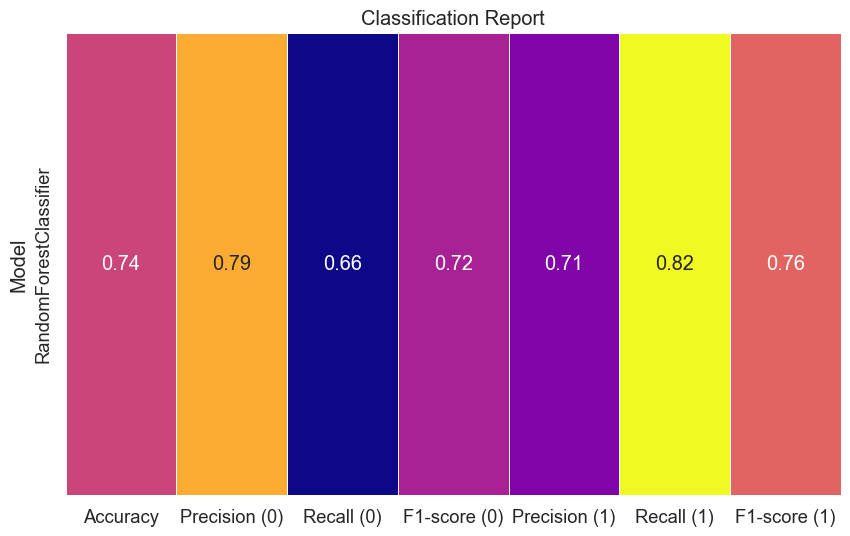

In [11]:
y_pred = model_random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

results = []
results.append({
    "Model": model_random_forest.__class__.__name__,
    "Accuracy": accuracy,
    "Precision (0)": report['0']['precision'],
    "Recall (0)": report['0']['recall'],
    "F1-score (0)": report['0']['f1-score'],
    "Precision (1)": report['1']['precision'],
    "Recall (1)": report['1']['recall'],
    "F1-score (1)": report['1']['f1-score']
})

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
table = sns.heatmap(pd.DataFrame(results).set_index('Model'), annot=True, cmap="plasma", fmt=".2f", linewidths=.5, cbar=False)
plt.title("Classification Report")
plt.show()

In [12]:
from joblib import dump
dump(model_random_forest, 'best_model.joblib')

['best_model.joblib']